# Red Wine Quality Prediction
Project Description: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading DataSet

df=pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.shape

(1599, 12)

In [4]:
#Checking the types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observation :

The dataset contains 12 columns & 1599 rows

This dataset contains 12 columns contains numerical data. Here "quality" is the target variable and dependent column. All others are independent columns

Only "quality" variable has integar datatype rest all the columns has float datatype.

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

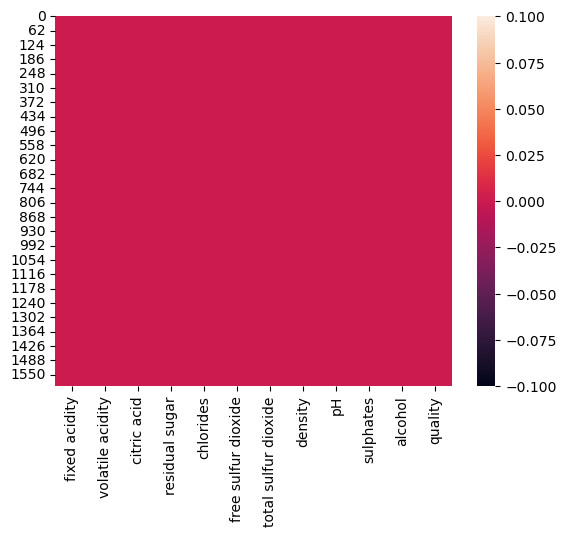

In [8]:
sns.heatmap(df.isnull())
plt.show()

Observations :

As We can clearly see there are no null values in the dataset.

All the columns has numerical datatype.

In [9]:
# checking duplicate values in the dataset
print("There are {} duplicates values present in the dataset".format(df.duplicated().sum()))

There are 240 duplicates values present in the dataset


In [10]:
#dropping duplicated Values
df.drop_duplicates(inplace=True)

In [11]:
#checking Duplicated Values again
df.duplicated().sum()

0

In [12]:
#checking dimension of data after removing duplicate values
df.shape

(1359, 12)

Observations :

As we can see there are 240 duplicated values present in the dataset and we have removed all the duplicate values in the dataframe.

After removing the duplicated values, now we have 1359 rows and 12 columns.

In [13]:
df.describe().T

count       mean        std      min      25%      50%  \
fixed acidity         1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
volatile acidity      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
citric acid           1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
residual sugar        1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
chlorides             1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
free sulfur dioxide   1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
total sulfur dioxide  1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
density               1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
pH                    1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
sulphates             1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
alcohol               1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
quality               1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                           75%        max  
fixed acidity          9.20000   15.90000  
volatile acidity       0.64000    1.58000  
citric acid            0.43000    1.00000  
residual sugar         2.60000   15.50000  
chlorides              0.09100    0.61100  
free sulfur dioxide   21.00000   72.00000  
total sulfur dioxide  63.00000  289.00000  
density                0.99782    1.00369  
pH                     3.40000    4.01000  
sulphates              0.73000    2.00000  
alcohol               11.10000   14.90000  
quality                6.00000    8.00000

Observations :

Counts of all the columns are same that means there is no missing values in the data.

Target variable/Dependent variable is discrete and categorical in nature.

Mean is more than median(50% percentile) in all the columns that means data is positively skewed.

Huge difference in 75% percentile and max value in 'residual sugar','free sulfar dioxide' and 'total sulfur dioxide' this indicates outliers are present.

In [14]:
# checking unique values
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Observations:
    
Fixed Acidity: This column appears to have a moderate number of unique values (96). It's likely a continuous variable with a relatively wide range of variation.

Volatile Acidity: The large number of unique values (143) suggests a wider range of variation compared to fixed acidity. It might also be a continuous variable with a broader distribution.

Citric Acid: With 80 unique values, citric acid seems to have a relatively smaller range of variation compared to volatile acidity. It might also be a continuous variable.

Residual Sugar: This column has 91 unique values, indicating a moderate range of variation. It's likely a continuous variable, possibly representing the amount of residual sugar in the wine.

Chlorides: The high number of unique values (153) suggests a wide range of variation in chloride content. Like the others, it's probably a continuous variable.

Free Sulfur Dioxide: With 60 unique values, this column has a relatively smaller range of variation. It might represent the amount of free sulfur dioxide in the wine and could be a continuous variable.

Total Sulfur Dioxide: The 144 unique values indicate a moderate range of variation. This column might represent the total sulfur dioxide content and could be a continuous variable.

Density: The 436 unique values indicate a wide range of variation in density. It's likely a continuous variable, and the wide range might indicate some outliers.

pH: With 89 unique values, pH also appears to have a relatively smaller range of variation. It represents the acidity or alkalinity of the wine and is probably a continuous variable.

Sulphates: This column has 96 unique values, similar to fixed acidity. It might be another continuous variable.

Alcohol: With 65 unique values, alcohol content seems to have a moderate range of variation. It's probably a continuous variable representing the alcohol percentage.

Quality: This column has 6 unique values, indicating it's a discrete variable representing different quality ratings. It might be used as the target variable for classification tasks or as a dependent variable in regression tasks.

### Bivariate Analysis:

Unique values present in alcohol : 6
5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


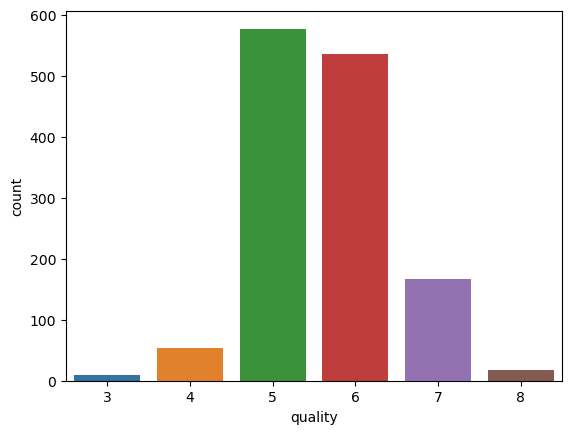

In [15]:
# value_count of quality column/Traget Variable
print('Unique values present in alcohol :', len(df['quality'].value_counts()))
print(df['quality'].value_counts())
sns.countplot(x='quality', data=df)
plt.show()

Unique values present in alcohol : 65
(9.7, 11.0]     528
(8.393, 9.7]    473
(11.0, 12.3]    265
(12.3, 13.6]     86
(13.6, 14.9]      7
Name: alcohol, dtype: int64


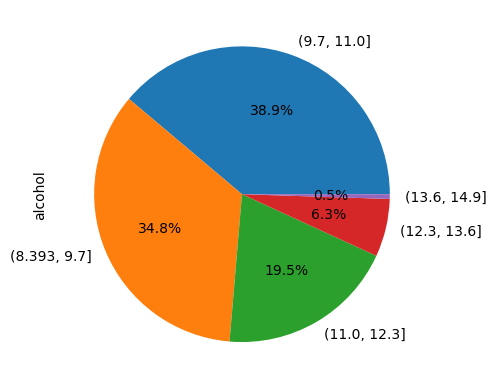

In [16]:
#exploring 'alcohol' variable
print('Unique values present in alcohol :',len(df['alcohol'].unique()))
print(df['alcohol'].value_counts(bins=5))
df['alcohol'].value_counts(bins=5).plot(kind='pie',autopct='%0.1f%%')
plt.show()

Observations :

The "alcohol" column has 65 unique values, indicating a moderate range of variation in alcohol content across the dataset.

The data is divided into five intervals (bins) based on alcohol content ranges:

(9.7, 11.0] Interval: There are 528 records falling within this range of alcohol content, suggesting that this range is the most common in the dataset.
(8.393, 9.7] Interval: There are 473 records falling within this lower range of alcohol content.

(11.0, 12.3] Interval: There are 265 records falling within this mid-range of alcohol content.

(12.3, 13.6] Interval: There are 86 records falling within this higher mid-range of alcohol content.

(13.6, 14.9] Interval: There are only 7 records with a relatively high alcohol content within this range.

The frequency distribution shows that the majority of observations fall into the two middle intervals, with decreasing frequency as we move towards the lower and higher alcohol content ranges. This suggests that wines in the mid-range of alcohol content are more prevalent in the dataset, while wines with extremely low or high alcohol content are less common.

Unique values present in Sulphate 96
(0.327, 0.664]    858
(0.664, 0.998]    446
(0.998, 1.332]     44
(1.332, 1.666]      8
(1.666, 2.0]        3
Name: sulphates, dtype: int64


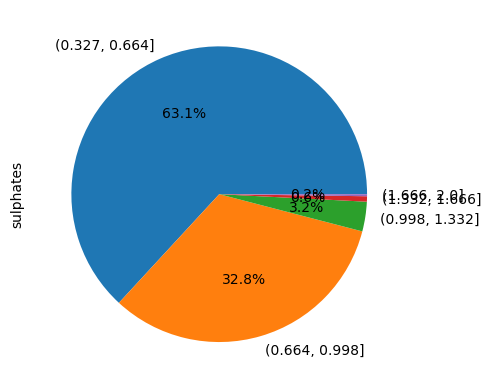

In [17]:
#exploring 'sulphates' variable
print("Unique values present in Sulphate",len(df['sulphates'].unique()))
print(df['sulphates'].value_counts(bins=5))
df['sulphates'].value_counts(bins=5).plot(kind='pie',autopct='%0.1f%%')
plt.show()

Observations :

The "sulphate" column has 96 unique values, indicating a wide range of variation in sulphate content across the dataset.

Frequency Distribution: The data is divided into five intervals (bins) based on sulphate content ranges, and the distribution is further analyzed in relation to wine quality:

(0.327, 0.664] Interval: In this range of sulphate content, there are 858 records. This indicates that the majority of wines with sulphate content in this interval are present in the dataset.

(0.664, 0.998] Interval: There are 446 records within this range, suggesting a significant presence of wines with slightly higher sulphate content.

(0.998, 1.332] Interval: Within this sulphate content range, there are 44 records. This range represents wines with a moderate sulphate content.

(1.332, 1.666] Interval: There are only 8 records within this interval, indicating that wines with sulphate content in this range are relatively rare in the dataset.

(1.666, 2.0] Interval: This range has the fewest records, with only 3 wines falling into this category, representing wines with a relatively high sulphate content.

The distribution of sulphate content ranges in relation to wine quality is not explicitly mentioned in the provided information. However, we can further analyze this data to see if there are any patterns or correlations between sulphate content and wine quality. It's possible that certain sulphate content ranges are more common in wines of particular quality ratings.

Unique values present in pH 89
(3.248, 3.502]    764
(2.994, 3.248]    428
(3.502, 3.756]    136
(2.738, 2.994]     24
(3.756, 4.01]       7
Name: pH, dtype: int64


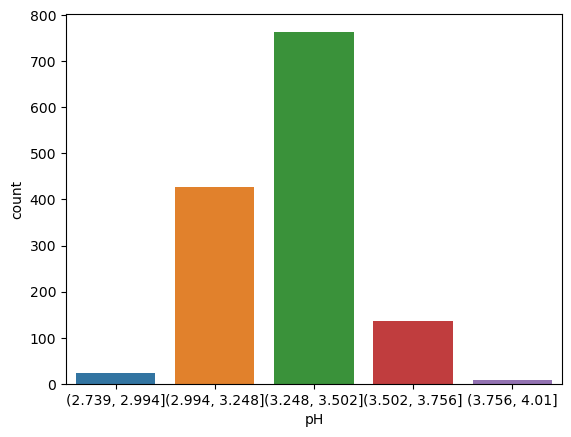

In [18]:
#exploring 'pH' variable
print("Unique values present in pH",len(df['pH'].unique()))
print(df['pH'].value_counts(bins=5))
bins = pd.cut(df['pH'], bins=5)
sns.countplot(x=bins, data=df)
plt.show()

The "pH" column has 89 unique values, indicating a range of variation in pH levels across the dataset.

Frequency Distribution and pH Intervals: The pH data is divided into five intervals (bins), and the distribution within each interval is provided:

(3.248, 3.502] Interval: This pH range is the most common, with 764 records. It suggests that a significant portion of the wines in the dataset falls within this pH range.

(2.994, 3.248] Interval: The second most common pH range contains 428 records, indicating a substantial presence of wines with slightly lower pH levels.

(3.502, 3.756] Interval: There are 136 records in this pH range, suggesting wines with slightly higher pH levels, but they are less common than those in the first two ranges.

(2.738, 2.994] Interval: This interval contains 24 records, representing wines with relatively lower pH levels.

(3.756, 4.01] Interval: The pH levels in this range are the least common, with only 7 records in this category, indicating that wines with higher pH levels are relatively rare in the dataset.

The provided information focuses on the distribution of pH levels but does not explicitly mention the relationship between pH levels and wine quality. However, we can further analyze this data to explore if certain pH level ranges are associated with specific wine quality ratings. For instance, do wines with higher or lower pH levels tend to receive higher or lower quality ratings?

Unique Values in density variable is : 436
(0.996, 0.998]    800
(0.993, 0.996]    292
(0.998, 1.001]    213
(0.989, 0.993]     31
(1.001, 1.004]     23
Name: density, dtype: int64


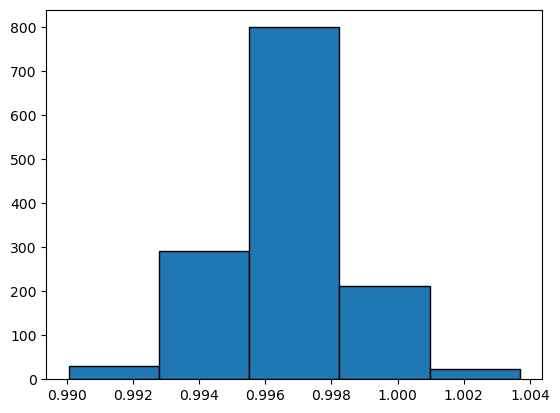

In [19]:
#exploring 'density' variable
print("Unique Values in density variable is :", len(df['density'].value_counts()))
print(df['density'].value_counts(bins=5))
plt.hist(df['density'], bins=5, edgecolor='k')
plt.show()

Observations :

Unique Values in Density: The "density" column has a total of 436 unique values, indicating a wide range of variation in density across the dataset.

The data is divided into five intervals (bins) based on density values, and the distribution within each interval is provided:

(0.996, 0.998] Interval: This density range contains 800 records, making it the most common density interval in the dataset. Wines within this density range are prevalent.

(0.993, 0.996] Interval: There are 292 records within this density range, indicating a substantial presence of wines with slightly lower density values compared to the most common range.

(0.998, 1.001] Interval: This interval contains 213 records, suggesting wines with slightly higher density values than the most common range.

(0.989, 0.993] Interval: With only 31 records in this range, wines with lower density values are relatively rare in the dataset.

(1.001, 1.004] Interval: The density levels in this range are the least common, with only 23 records in this category, indicating that wines with higher density values are relatively rare.

We can investigate if there are any patterns or correlations between density and wine quality. For example, we can explore if wines with certain density ranges tend to have higher or lower quality ratings.


Unique Values in total sulfur dioxide variable is : 144
(5.715999999999999, 62.6]    1015
(62.6, 119.2]                 288
(119.2, 175.8]                 54
(232.4, 289.0]                  2
(175.8, 232.4]                  0
Name: total sulfur dioxide, dtype: int64


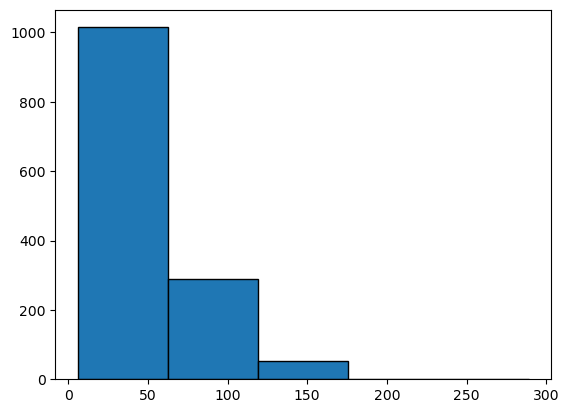

In [20]:
#exploring 'total sulfur dioxide' variable
print("Unique Values in total sulfur dioxide variable is :", len(df['total sulfur dioxide'].value_counts()))
print(df['total sulfur dioxide'].value_counts(bins=5))
plt.hist(df['total sulfur dioxide'], bins=5, edgecolor='k')
plt.show()

Observations :

The "total sulfur dioxide" column has 144 unique values, indicating a moderate range of variation in total sulfur dioxide levels across the dataset.

The data is divided into five intervals (bins) based on total sulfur dioxide values, and the distribution within each interval is provided:

(5.716, 62.6] Interval: This interval contains 1015 records, making it the most common range for total sulfur dioxide levels. It suggests that a significant portion of wines in the dataset falls within this range.

(62.6, 119.2] Interval: There are 288 records within this range, indicating a presence of wines with higher total sulfur dioxide levels compared to the most common range, although they are less common.

(119.2, 175.8] Interval: This interval contains 54 records, suggesting wines with higher total sulfur dioxide levels but representing a relatively small portion of the dataset.

(232.4, 289.0] Interval: With only 2 records in this range, wines with total sulfur dioxide levels in this high range are very rare in the dataset.

(175.8, 232.4] Interval: Interestingly, this interval has zero records, indicating that there are no wines falling into this particular range in the dataset.

We can explore if there are any patterns or correlations between total sulfur dioxide levels and wine quality. For instance, we can investigate if wines with higher or lower total sulfur dioxide levels tend to have higher or lower quality ratings.

Unique Values in free sulfur dioxide variable is : 60
(0.928, 15.2]    781
(15.2, 29.4]     426
(29.4, 43.6]     129
(43.6, 57.8]      20
(57.8, 72.0]       3
Name: free sulfur dioxide, dtype: int64


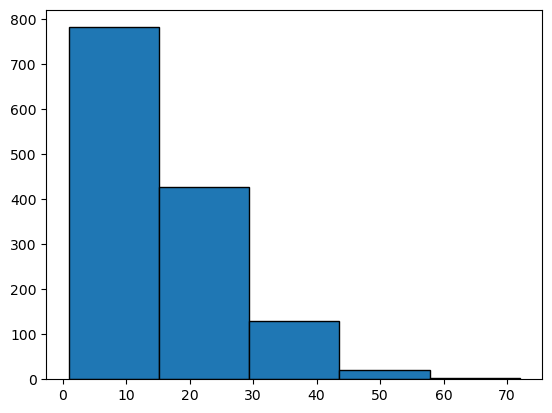

In [21]:
#exploring 'free sulfur dioxide' variable
print("Unique Values in free sulfur dioxide variable is :", len(df['free sulfur dioxide'].value_counts()))
print(df['free sulfur dioxide'].value_counts(bins=5))
plt.hist(df['free sulfur dioxide'], bins=5, edgecolor='k')
plt.show()

Observations :

The "free sulfur dioxide" column has 60 unique values, indicating a relatively smaller range of variation in free sulfur dioxide levels across the dataset.

The data is divided into five intervals (bins) based on free sulfur dioxide values, and the distribution within each interval is provided:

(0.928, 15.2] Interval: This interval contains 781 records, making it the most common range for free sulfur dioxide levels. It suggests that a significant portion of wines in the dataset falls within this range.

(15.2, 29.4] Interval: There are 426 records within this range, indicating a presence of wines with moderately higher free sulfur dioxide levels compared to the most common range, although they are less common.

(29.4, 43.6] Interval: This interval contains 129 records, suggesting wines with higher free sulfur dioxide levels but representing a smaller portion of the dataset.

(43.6, 57.8] Interval: With only 20 records in this range, wines with free sulfur dioxide levels in this higher range are relatively rare in the dataset.

(57.8, 72.0] Interval: This interval has the fewest records, with only 3 wines falling into this category, indicating that wines with the highest free sulfur dioxide levels are extremely rare.

We can explore if there are any patterns or correlations between free sulfur dioxide levels and wine quality. For example, you can investigate if wines with higher or lower free sulfur dioxide levels tend to have higher or lower quality ratings.

Unique Values in chlorides variable is : 153
(0.0104, 0.132]    1286
(0.132, 0.252]       49
(0.252, 0.371]       11
(0.371, 0.491]       11
(0.491, 0.611]        2
Name: chlorides, dtype: int64


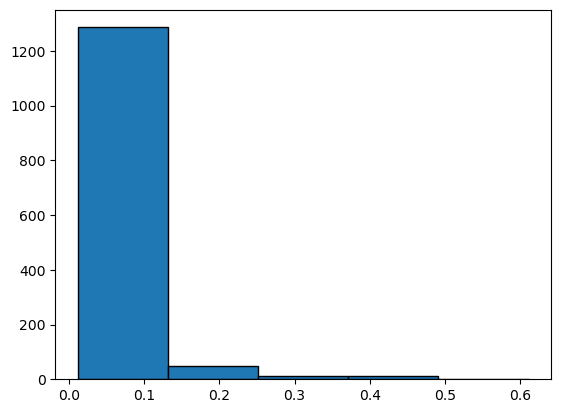

In [22]:
#exploring 'chlorides' variable
print("Unique Values in chlorides variable is :", len(df['chlorides'].value_counts()))
print(df['chlorides'].value_counts(bins=5))
plt.hist(df['chlorides'], bins=5, edgecolor='k')
plt.show()

Observations :

The "chlorides" column has 153 unique values, indicating a wide range of variation in chloride levels across the dataset.

Frequency Distribution: The data is divided into five intervals (bins) based on chloride values, and the distribution within each interval is provided:

(0.0104, 0.132] Interval: This interval contains 1286 records, making it the most common range for chloride levels. It suggests that a significant portion of wines in the dataset falls within this range.

(0.132, 0.252] Interval: There are 49 records within this range, indicating a presence of wines with moderately higher chloride levels compared to the most common range, although they are less common.

(0.252, 0.371] Interval: This interval contains 11 records, suggesting wines with higher chloride levels but representing a relatively small portion of the dataset.

(0.371, 0.491] Interval: With 11 records in this range, wines with chloride levels in this higher range are relatively rare in the dataset.

(0.491, 0.611] Interval: This interval has the fewest records, with only 2 wines falling into this category, indicating that wines with the highest chloride levels are extremely rare.

We can explore if there are any patterns or correlations between chloride levels and wine quality. For example, we can investigate if wines with higher or lower chloride levels tend to have higher or lower quality ratings.

Unique Values in residual sugar variable is : 91
(0.884, 3.82]    1246
(3.82, 6.74]       89
(6.74, 9.66]       16
(12.58, 15.5]       6
(9.66, 12.58]       2
Name: residual sugar, dtype: int64


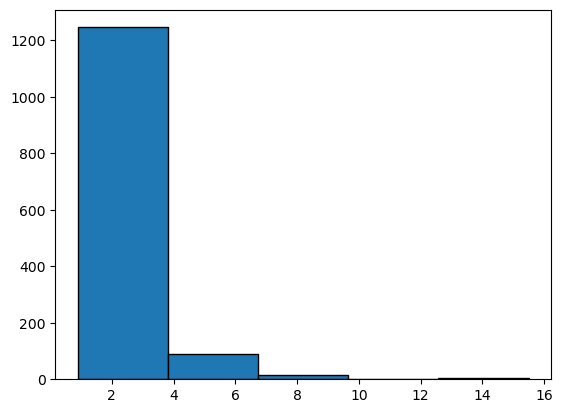

In [23]:
#exploring 'residual sugars' variable
print("Unique Values in residual sugar variable is :", len(df['residual sugar'].value_counts()))
print(df['residual sugar'].value_counts(bins=5))
plt.hist(df['residual sugar'], bins=5, edgecolor='k')
plt.show()

Observations:

The "residual sugar" column has 91 unique values, indicating a moderate range of variation in residual sugar levels across the dataset.

The data is divided into five intervals (bins) based on residual sugar values, and the distribution within each interval is provided:

(0.884, 3.82] Interval: This interval contains 1246 records, making it the most common range for residual sugar levels. It suggests that a significant portion of wines in the dataset falls within this range.

(3.82, 6.74] Interval: There are 89 records within this range, indicating a presence of wines with moderately higher residual sugar levels compared to the most common range, although they are less common.

(6.74, 9.66] Interval: This interval contains 16 records, suggesting wines with higher residual sugar levels but representing a relatively small portion of the dataset.

(12.58, 15.5] Interval: With only 6 records in this range, wines with very high residual sugar levels are rare in the dataset.
(9.66, 12.58] Interval: This interval has the fewest records, with only 2 wines falling into this category, indicating that wines with extremely high residual sugar levels are extremely rare.

We can explore if there are any patterns or correlations between residual sugar levels and wine quality. For example, we can investigate if wines with higher or lower residual sugar levels tend to have higher or lower quality ratings.

Unique Values in citric acid variable is : 80
(-0.002, 0.2]    539
(0.2, 0.4]       438
(0.4, 0.6]       316
(0.6, 0.8]        65
(0.8, 1.0]         1
Name: citric acid, dtype: int64


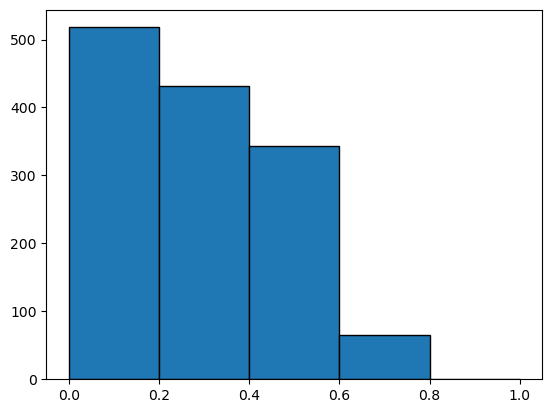

In [24]:
#exploring 'citric acid' variable
print("Unique Values in citric acid variable is :", len(df['citric acid'].value_counts()))
print(df['citric acid'].value_counts(bins=5))
plt.hist(df['citric acid'], bins=5, edgecolor='k')
plt.show()

Unique Values in volatile acidity variable is : 143
(0.412, 0.704]    742
(0.118, 0.412]    415
(0.704, 0.996]    179
(0.996, 1.288]     20
(1.288, 1.58]       3
Name: volatile acidity, dtype: int64


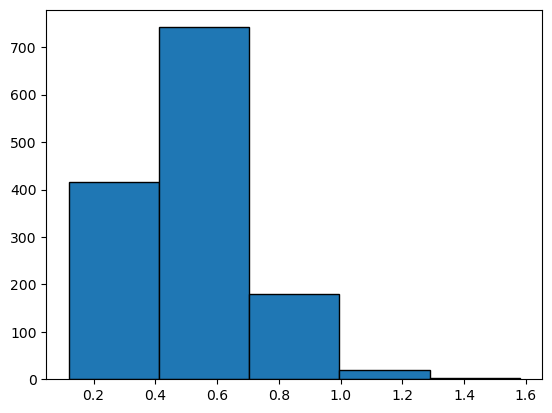

In [25]:
#exploring 'volatile acidity' variable
print("Unique Values in volatile acidity variable is :", len(df['volatile acidity'].value_counts()))
print(df['volatile acidity'].value_counts(bins=5))
plt.hist(df['volatile acidity'], bins=5, edgecolor='k')
plt.show()

Unique Values in fixed acidity variable is : 96
(6.86, 9.12]      771
(9.12, 11.38]     255
(4.588, 6.86]     237
(11.38, 13.64]     87
(13.64, 15.9]       9
Name: fixed acidity, dtype: int64


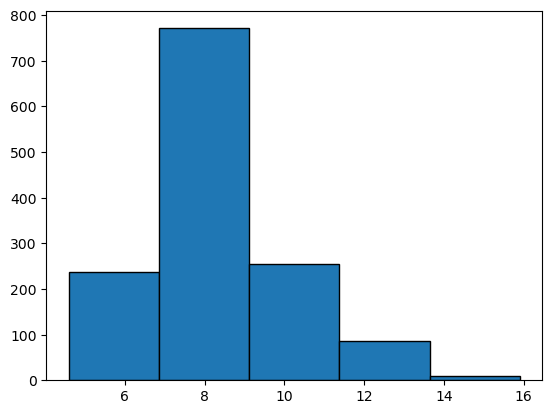

In [26]:
#exploring 'fixed acidity' variable
print("Unique Values in fixed acidity variable is :", len(df['fixed acidity'].value_counts()))
print(df['fixed acidity'].value_counts(bins=5))
plt.hist(df['fixed acidity'], bins=5, edgecolor='k')
plt.show()

### Bivariate Analysis

In [27]:
df.groupby('quality').mean().T

quality                       3          4          5          6          7  \
fixed acidity          8.360000   7.779245   8.171231   8.337383   8.858683   
volatile acidity       0.884500   0.693962   0.578596   0.496084   0.403653   
citric acid            0.171000   0.174151   0.244523   0.279364   0.371856   
residual sugar         2.635000   2.694340   2.509532   2.457290   2.716766   
chlorides              0.122500   0.090679   0.093971   0.085075   0.076832   
free sulfur dioxide   11.000000  12.264151  17.161179  15.637383  13.994012   
total sulfur dioxide  24.900000  36.245283  57.406412  40.816822  35.449102   
density                0.997464   0.996542   0.997082   0.996565   0.996051   
pH                     3.398000   3.381509   3.300815   3.318000   3.290060   
sulphates              0.570000   0.596415   0.623570   0.674542   0.742635   
alcohol                9.955000  10.265094   9.888562  10.658879  11.491118   

quality                       8  
fixed acidity          8.441176  
volatile acidity       0.427647  
citric acid            0.382941  
residual sugar         2.576471  
chlorides              0.068353  
free sulfur dioxide   13.764706  
total sulfur dioxide  34.470588  
density                0.995095  
pH                     3.274118  
sulphates              0.774706  
alcohol               12.158824

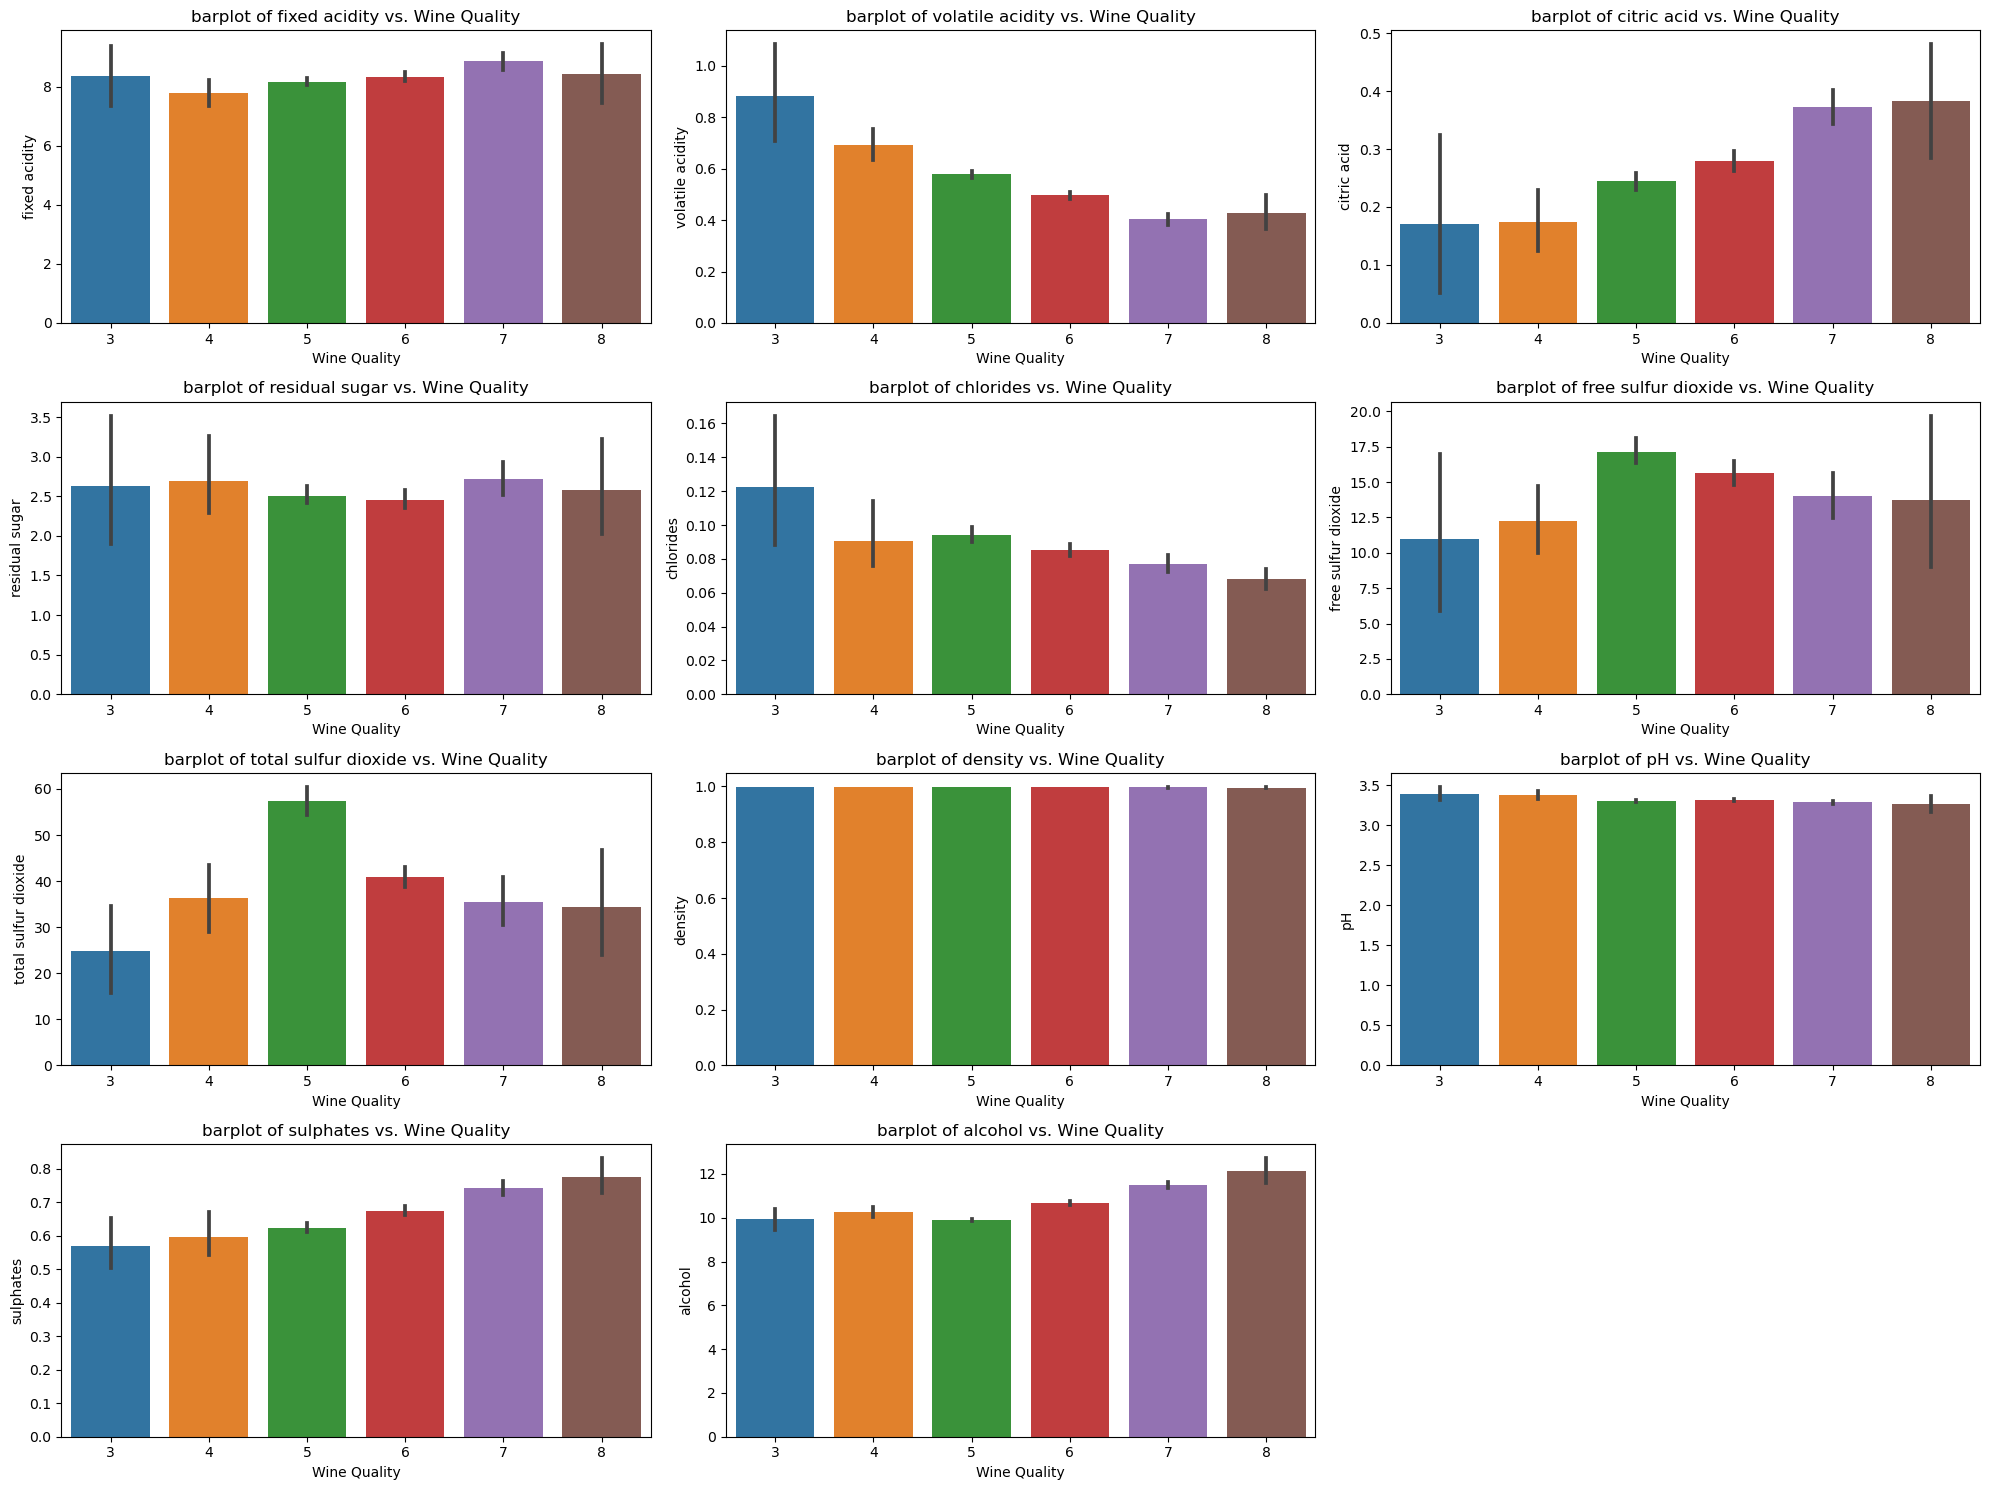

In [28]:
#Visualization with barplot
plt.figure(figsize=(20, 15))
p=1
for i in df.columns[:-1]:
    if p <= 12:
        plt.subplot(4,3,p)
        sns.barplot(x='quality', y=i, data=df)
        plt.xticks()
        plt.title(f'barplot of {i} vs. Wine Quality')
        plt.xlabel('Wine Quality')
        plt.ylabel(i)
        p += 1
plt.tight_layout()
plt.show()


Observations :

Fixed Acidity: As wine quality increases from 4 to 8, there is a slight upward trend in fixed acidity levels. Wines with higher quality ratings tend to have slightly higher fixed acidity.

Volatile Acidity: There is a noticeable decrease in volatile acidity levels as wine quality improves. Wines with higher quality ratings (7 and 8) have significantly lower volatile acidity compared to wines with lower ratings (4 and 5).

Citric Acid: Citric acid levels generally increase as wine quality improves. Higher-quality wines (7 and 8) tend to have higher citric acid content compared to lower-quality wines (4 and 5).

Residual Sugar: There is no strong trend in residual sugar levels with respect to wine quality. The differences in residual sugar content among different quality ratings are relatively small.

Chlorides: Chloride levels show a slight decrease as wine quality increases. Higher-quality wines (7 and 8) tend to have slightly lower chloride content compared to lower-quality wines (4 and 5).

Free Sulfur Dioxide: There is a minor decrease in free sulfur dioxide levels as wine quality improves. Higher-quality wines have slightly lower free sulfur dioxide content.

Total Sulfur Dioxide: Total sulfur dioxide levels also show a minor decrease as wine quality increases. Wines with higher quality ratings tend to have slightly lower total sulfur dioxide levels.

Density: Density remains relatively consistent across different wine quality ratings. There is no strong trend in density with respect to wine quality.

pH: pH levels show a subtle decrease as wine quality improves. Higher-quality wines tend to have slightly lower pH values.
Sulphates: There is a trend of increasing sulphate levels as wine quality improves. Higher-quality wines (7 and 8) tend to have higher sulphate content compared to lower-quality wines (4 and 5).

Alcohol: Alcohol content significantly increases with higher wine quality ratings. Wines with higher quality ratings (7 and 8) have notably higher alcohol content compared to lower-quality wines (4 and 5).

These observations provide insights into how various wine characteristics relate to wine quality ratings. For example, lower volatile acidity and higher alcohol content are associated with higher-quality wines, while other characteristics such as fixed acidity and citric acid also exhibit some differences across quality ratings. These insights can be valuable for understanding the factors that contribute to wine quality and for making predictions or recommendations related to wine quality based on these characteristics.

### Correlation between target variable & independent variables.

In [29]:
dfcor=df.corr()
dfcor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

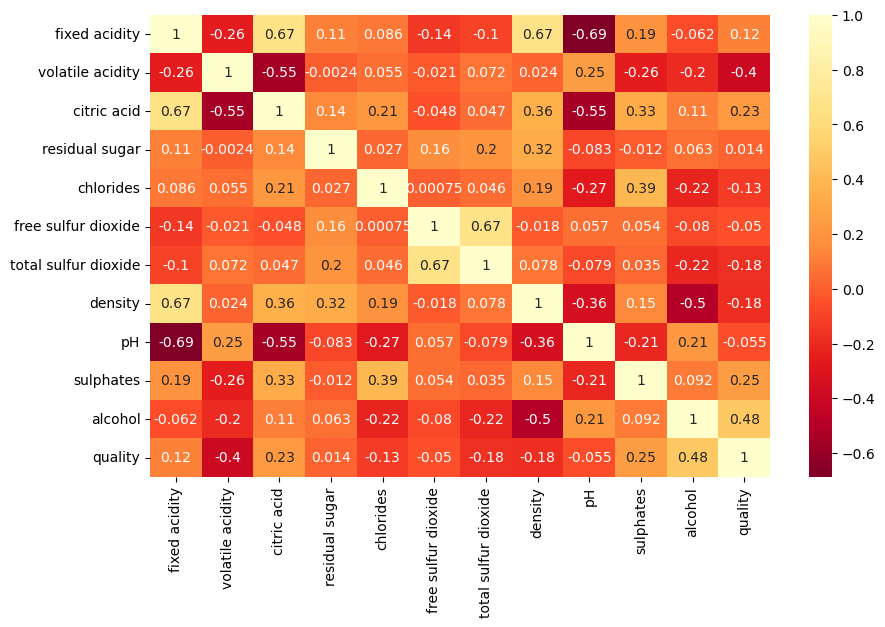

In [30]:
#lets Visualize with Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)
plt.show()

In [31]:
corQua= df.corr()['quality'].sort_values()
corQua

volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
fixed acidity           0.119024
citric acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

### MULTIVARIATE Analysis

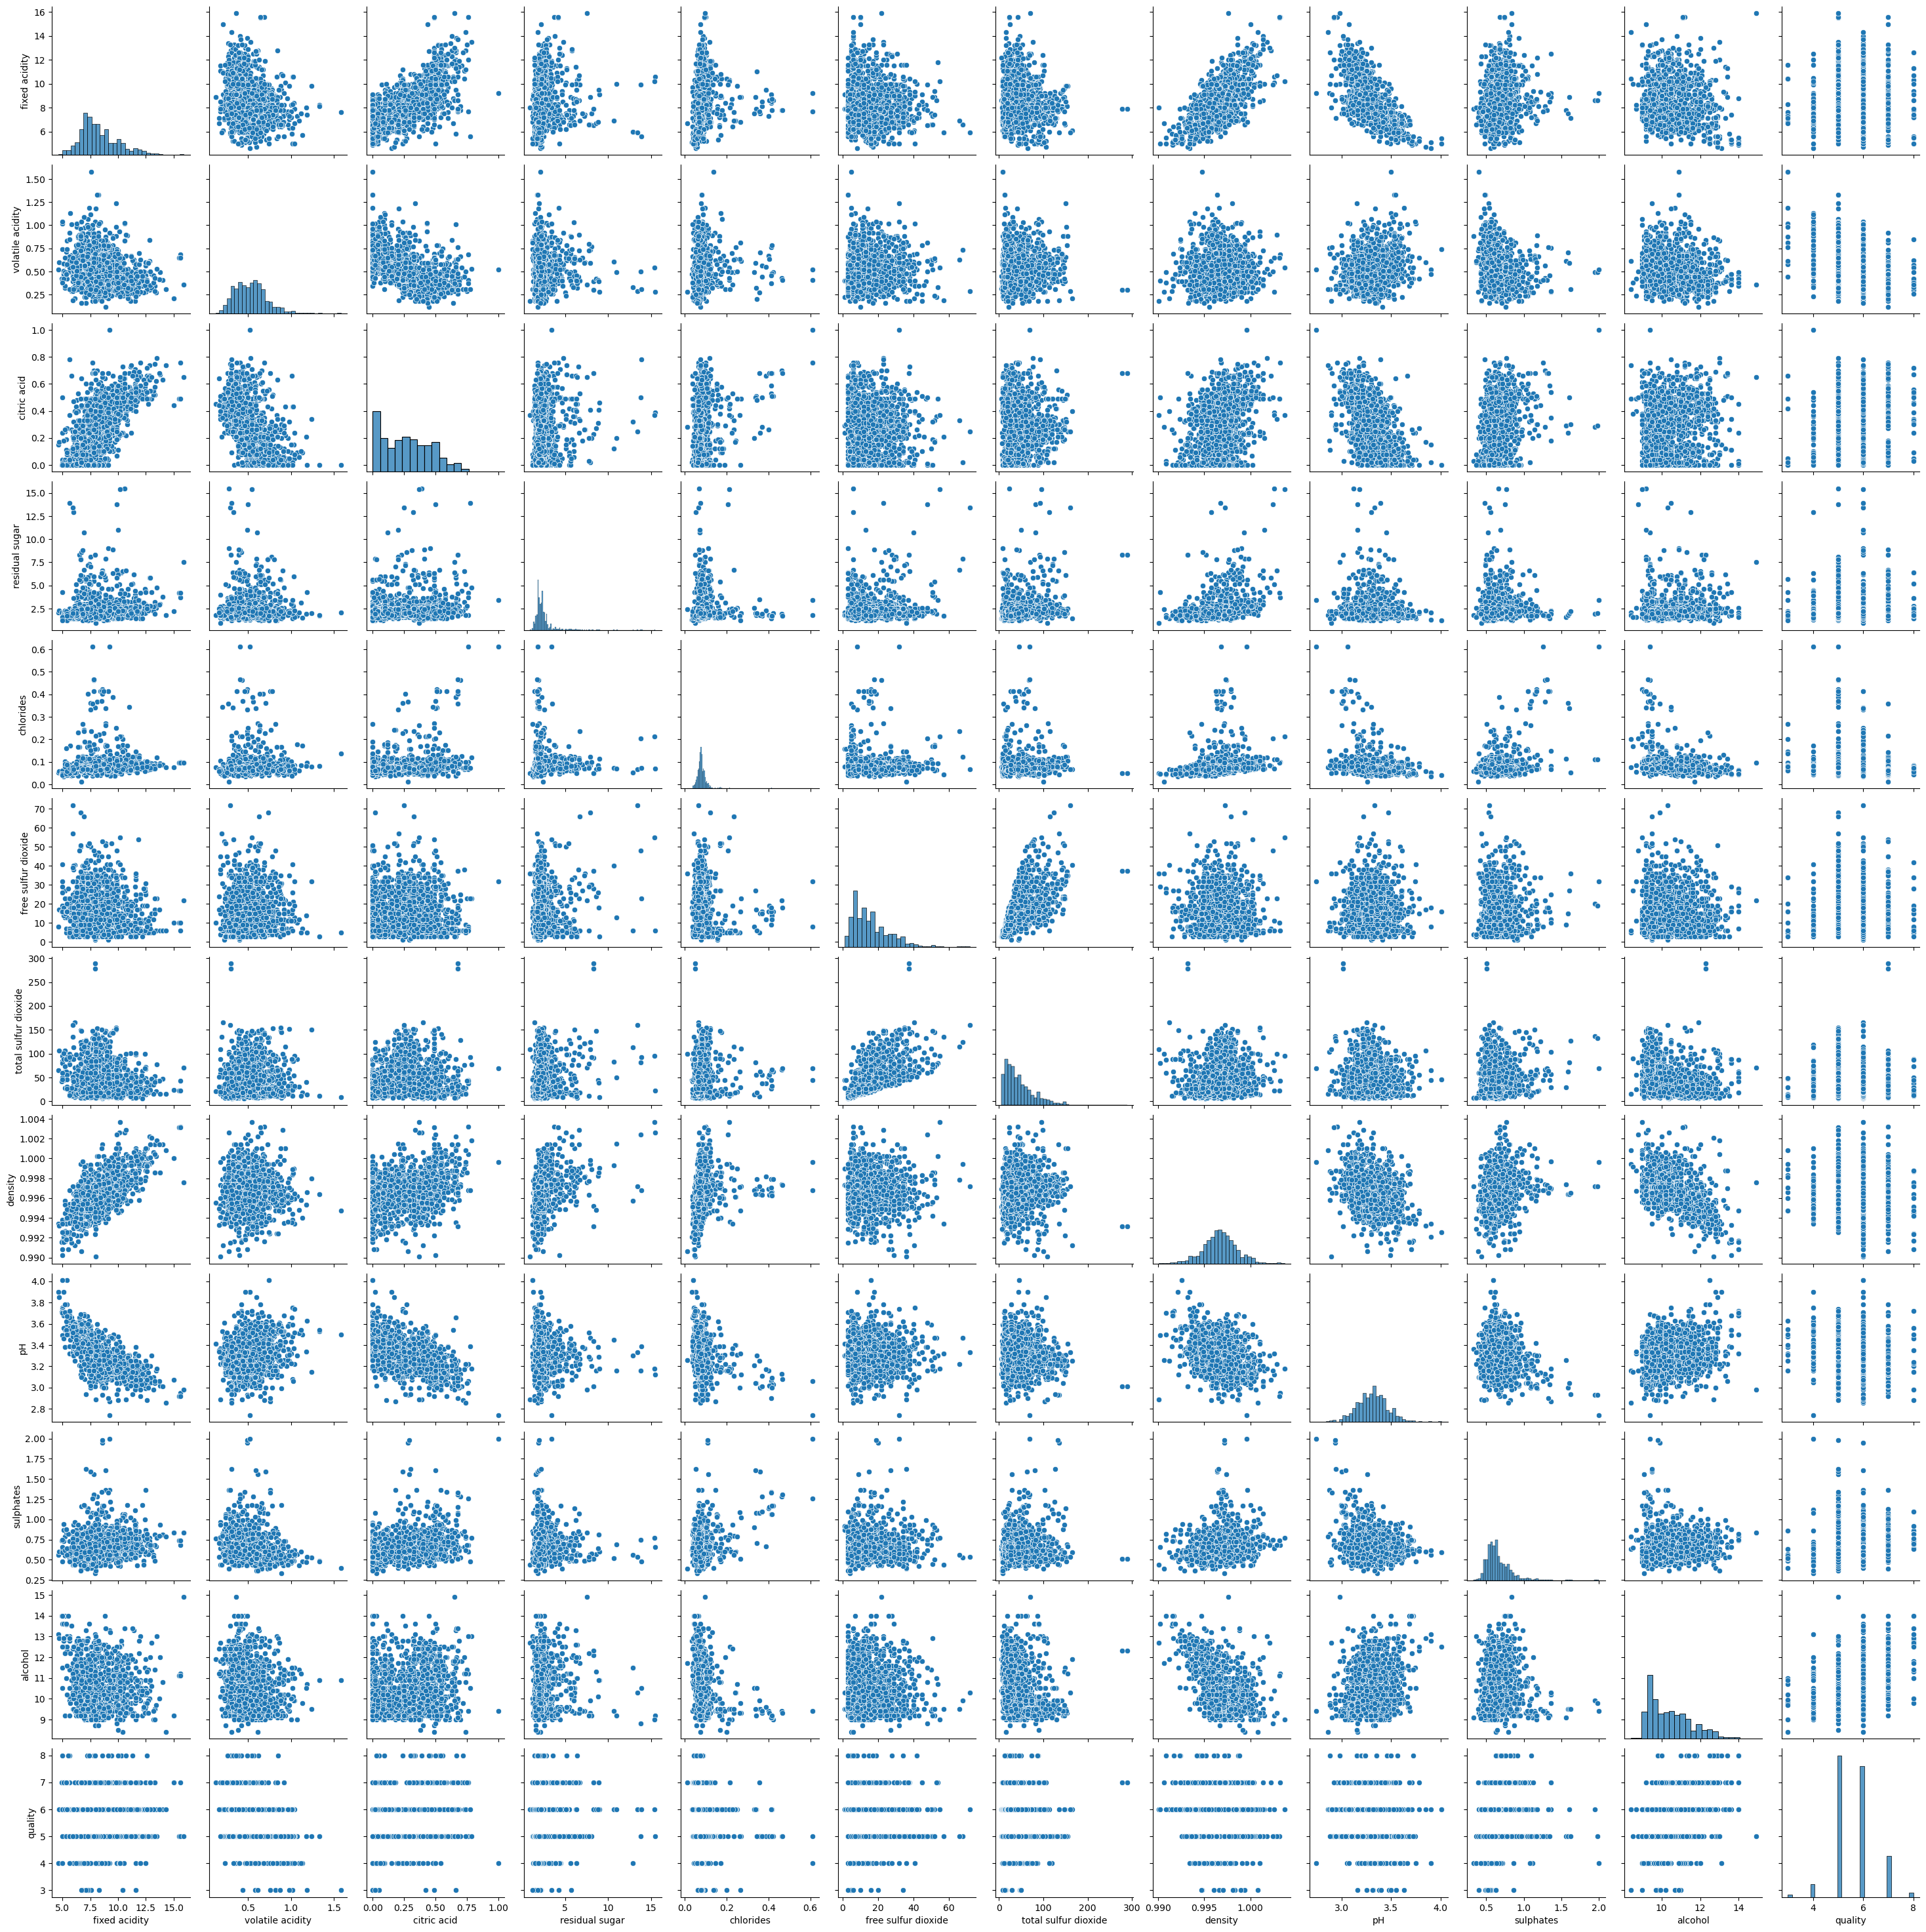

In [32]:
sns.pairplot(df)

In [33]:
#checking Skewness & Kurtosis
print("Skewness in the data \n",df.skew())
print("\nKurtosis in the data \n",df.kurt())

Skewness in the data 
 fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

Kurtosis in the data 
 fixed acidity            1.049673
volatile acidity         1.249243
citric acid             -0.788921
residual sugar          29.364592
chlorides               38.624653
free sulfur dioxide      1.892691
total sulfur dioxide     4.042257
density                  0.830659
pH                       0.879790
sulphates               11.102282
alcohol                  0.159739
quality                  0.340256
dtype: float64


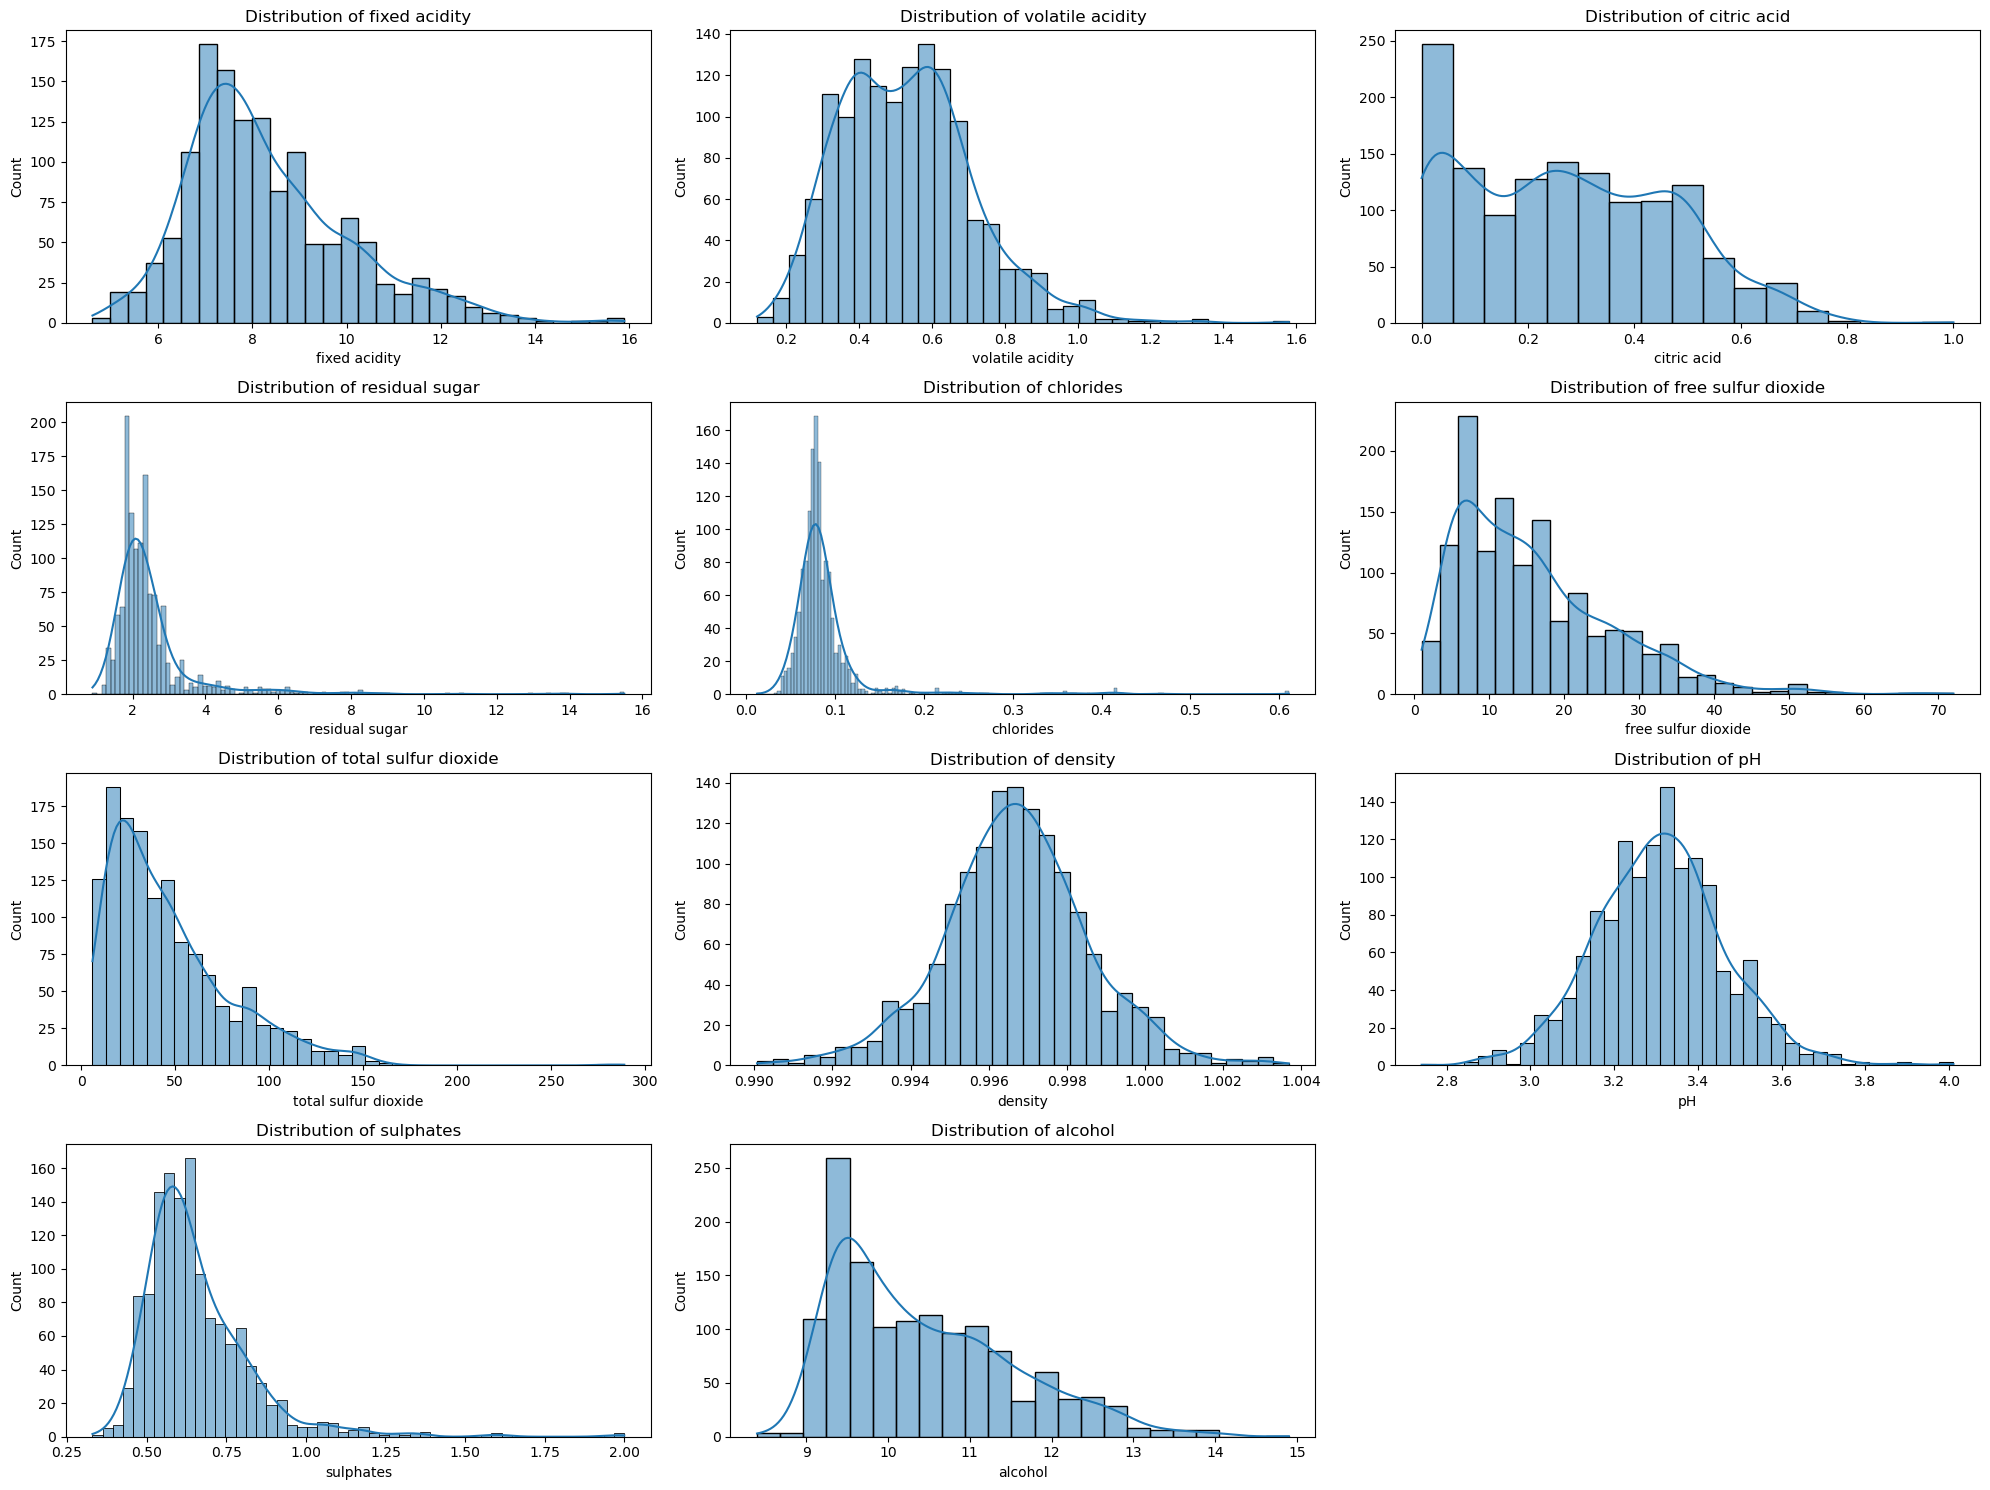

In [34]:
#lets Visualize it

plt.figure(figsize=(20, 15))
p=1
for i in df.columns[:-1]:
    if p <= 12:
        plt.subplot(4,3,p)
        sns.histplot(data=df, x=i, kde=True)
        plt.xticks()
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        p += 1
plt.tight_layout()
plt.show()

Observation :

'residual sugar' & 'chlorides' variables has high positive skewness. This two variables are skewed to the right, with a longer tail on the positive side.

'sulphates' has positive skewness with value 2.406505, indicates right skewed distribution.

'free sulfur dioxide' & 'total sulfur dioxide' has moderate right Skewed distribution.

'fixed acidity' and 'volatile acidity' have positive skewness, although their skewness values are relatively lower at 0.940002 and 0.728474, respectively. This suggests a slight right-skewness in their distributions.

'pH' and 'quality' shows minimal skewness & their distributions are approximately symmetric.

'citric acid', 'density', and 'alcohol' variables have very low skewness values, close to zero. This indicates that their distributions are approximately symmetric or very close to being symmetrical.

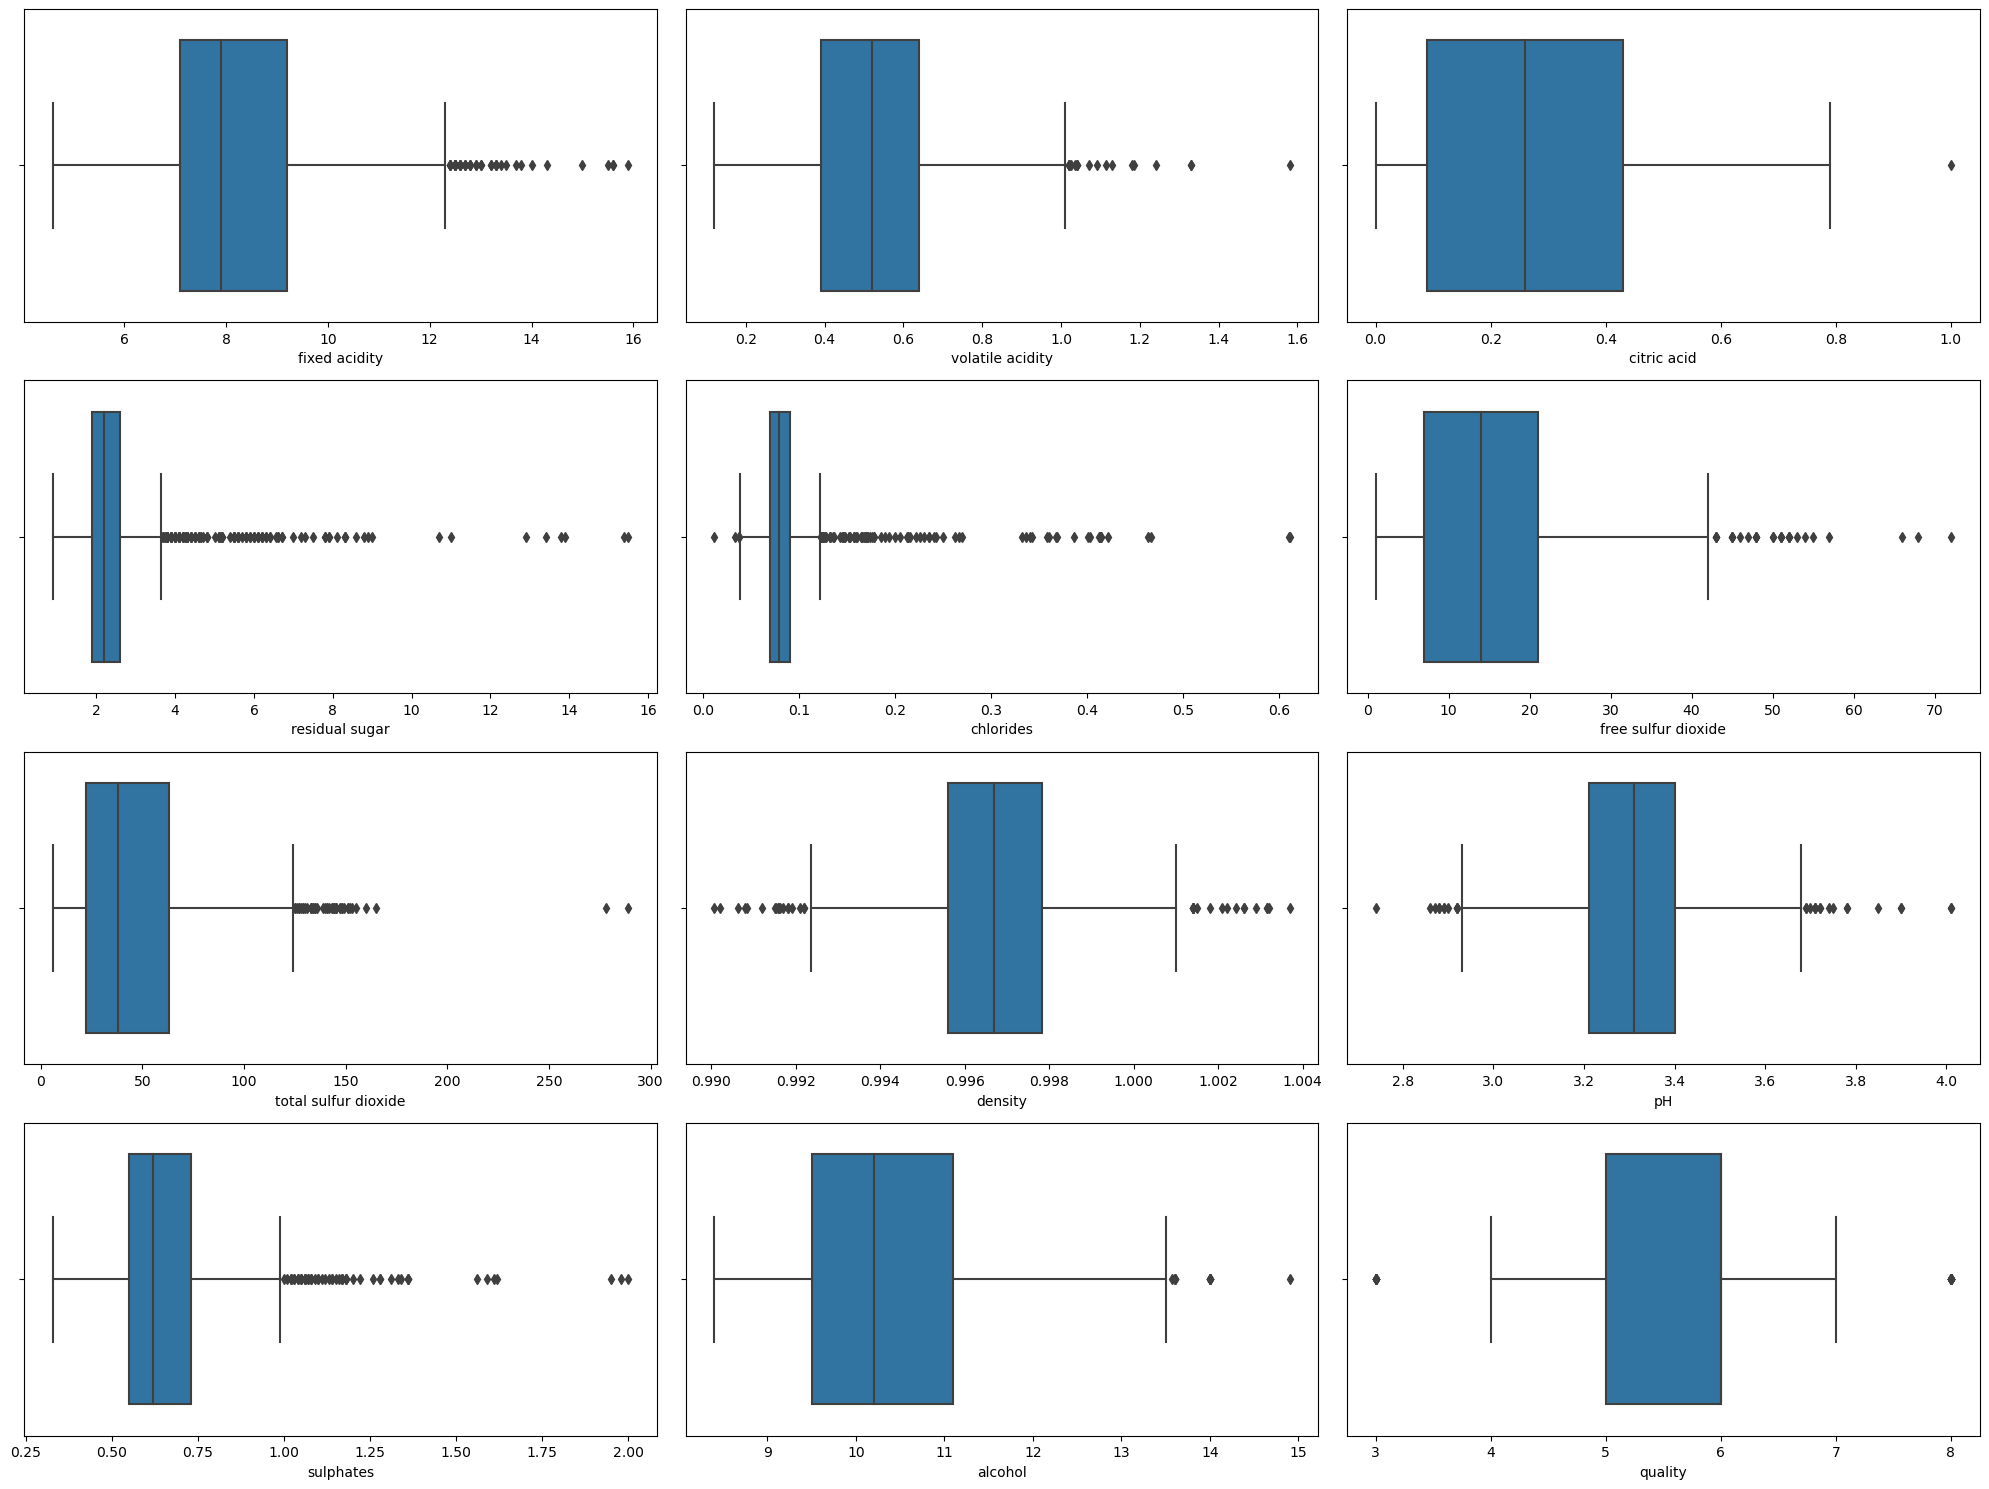

In [35]:
#checking for outliers in data

plt.figure(figsize=(20, 15))
p=1
for i in df.columns:
    if p <= 12:
        plt.subplot(4,3,p)
        sns.boxplot(data= df, x=df[i])
        plt.xticks()
        plt.xlabel(i)
        p += 1
plt.tight_layout()
plt.show()


Observations: We can clearly see that outliers are present in all the columns.

In [37]:
#lets Remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold=3

#dropping outliers
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1232, 12)

In [38]:
#shape of Old & New DataFrame
print("Old DataFrame",df.shape[0])
print("New DataFrame",df_new.shape[0])
print("Data loss Percentage ", ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Old DataFrame 1359
New DataFrame 1232
Data loss Percentage  9.345106696100073


Observations: As you can clearly visualize that our old dataframe has 1359 rows and in our new dataframe we have 1232 rows, so our data loss percentage is 9.34%

In thatcase, instead of removing outliers we are removing Skewness from the data.

In [39]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df2 = pt.fit_transform(df.iloc[:,:-1])
df2 =pd.DataFrame(df2, columns = df.iloc[:,:-1].columns)
df2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.439412          0.978091    -1.530544       -0.602600  -0.166676   
1      -0.161475          1.720040    -1.530544        0.560720   0.778512   
2      -0.161475          1.242047    -1.256962        0.153076   0.557116   
3       1.529010         -1.551503     1.389613       -0.602600  -0.219369   
4      -0.439412          0.791661    -1.530544       -0.844564  -0.219369   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.269573             -0.128948  0.587781  1.277041  -0.582775   
1             0.992495              0.841796  0.054350 -0.695907   0.400130   
2             0.192377              0.530012  0.161294 -0.296058   0.188379   
3             0.384096              0.681966  0.694083 -0.967619  -0.391438   
4            -0.023152              0.100926  0.587781  1.277041  -0.582775   

    alcohol  
0 -1.068157  
1 -0.499290  
2 -0.499290  
3 -0.499290  
4 -1.068157

In [40]:
df2.skew()

fixed acidity           0.001884
volatile acidity        0.008311
citric acid             0.016563
residual sugar         -0.001715
chlorides              -0.061923
free sulfur dioxide    -0.009899
total sulfur dioxide   -0.003897
density                -0.002812
pH                     -0.005007
sulphates               0.014637
alcohol                 0.116742
dtype: float64

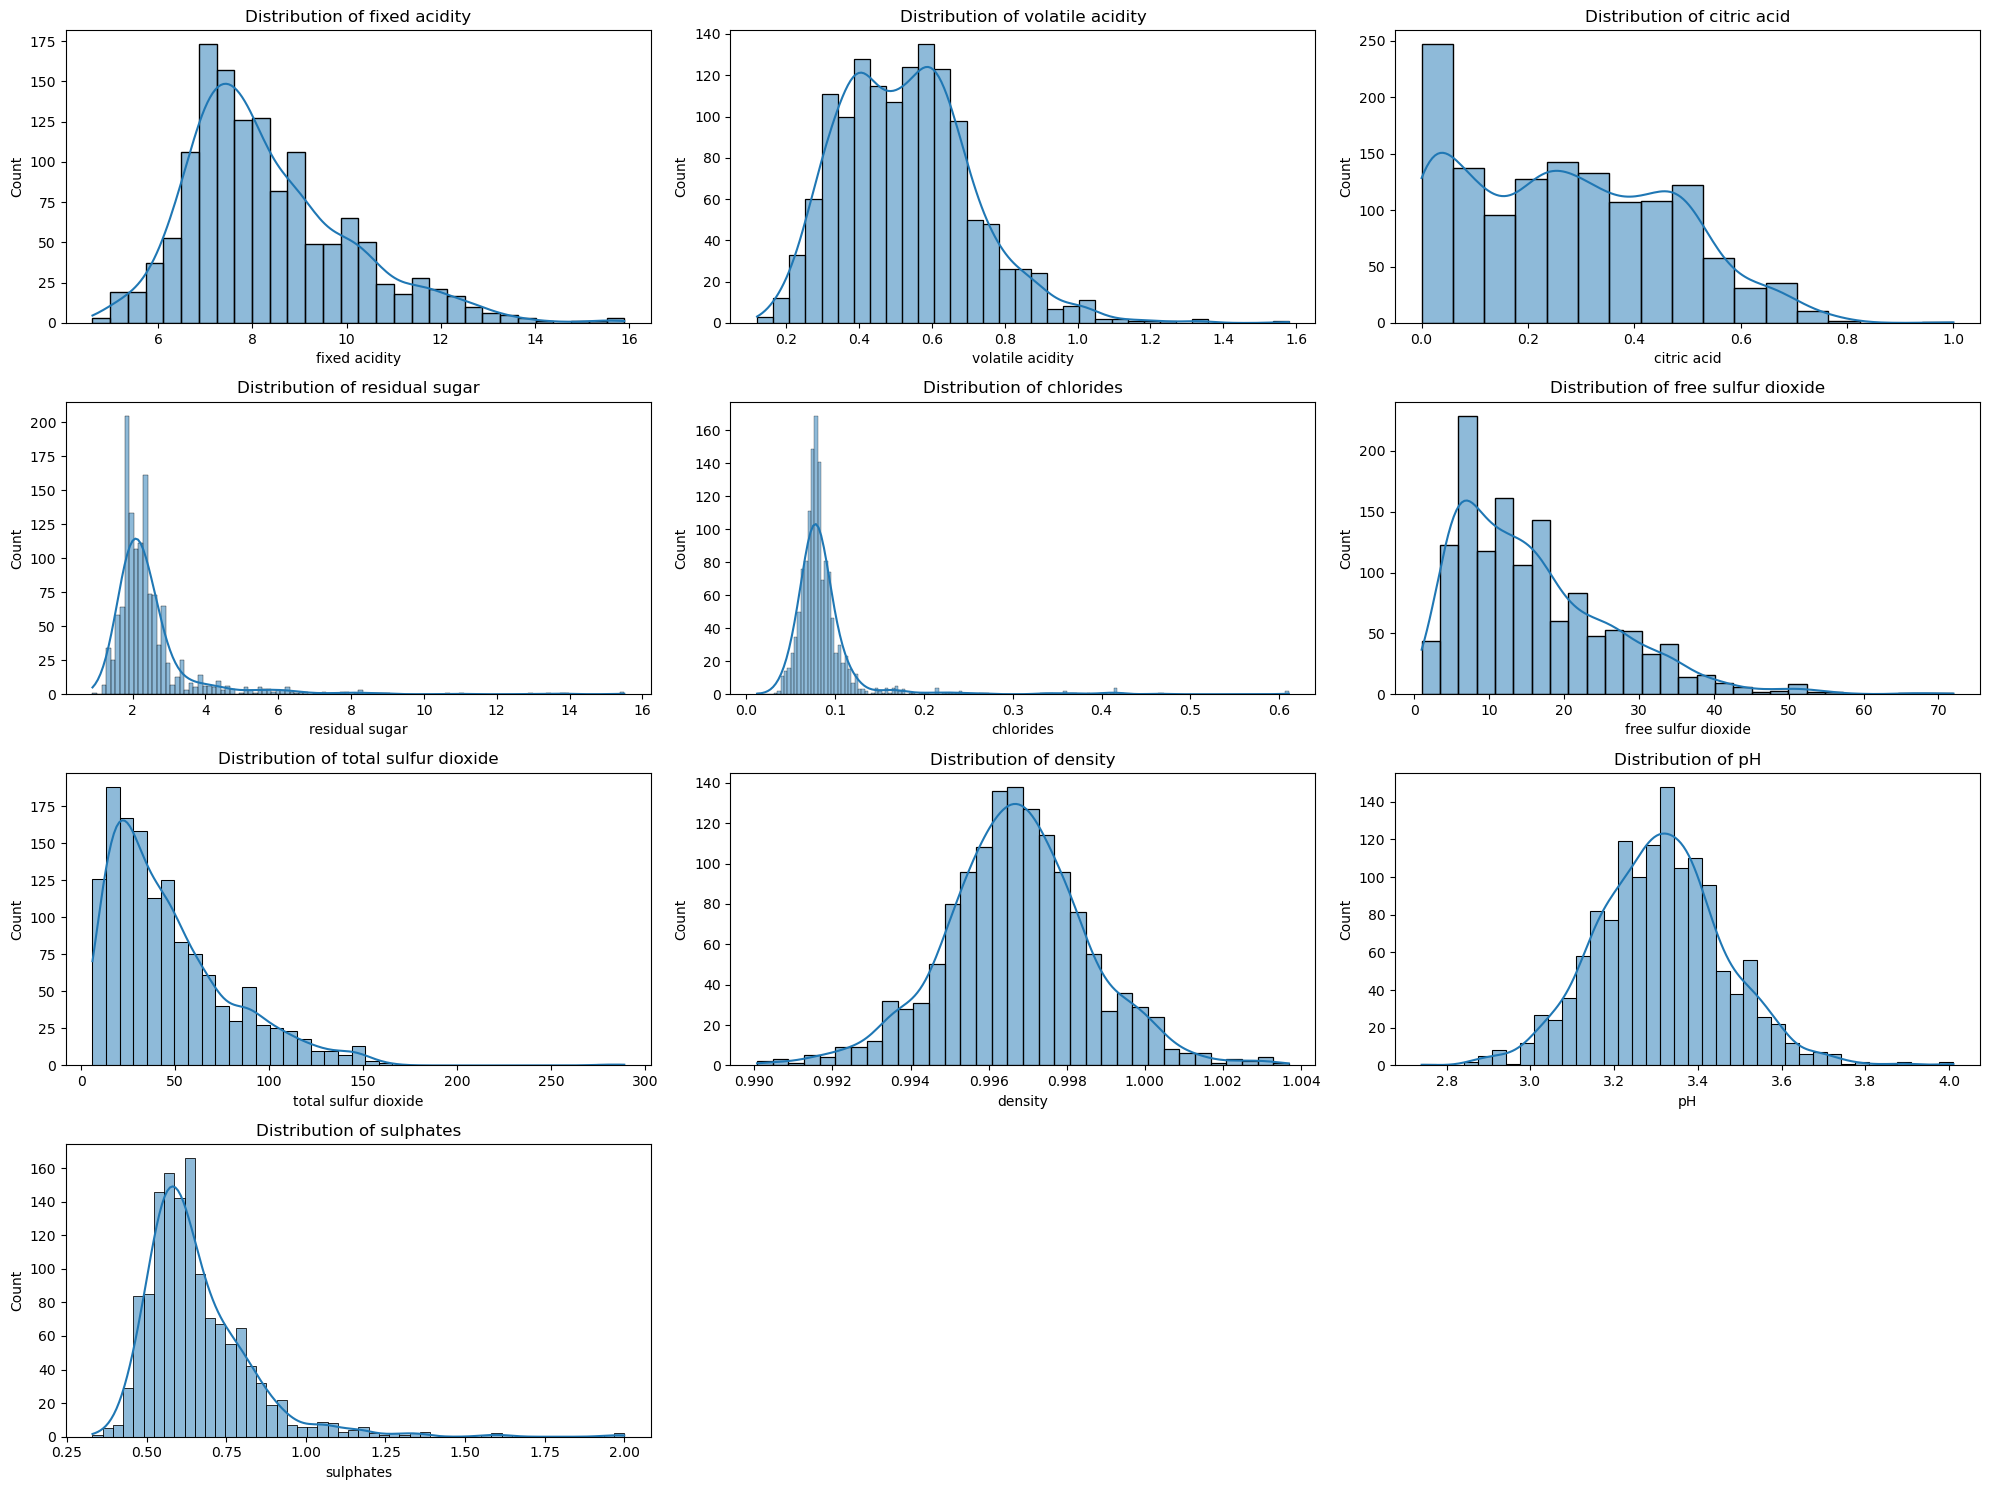

In [41]:
#lets Visualize it

plt.figure(figsize=(20, 15))
p=1
for i in df2.columns[:-1]:
    if p <= 12:
        plt.subplot(4,3,p)
        sns.histplot(data=df, x=i, kde=True)
        plt.xticks()
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        p += 1
plt.tight_layout()
plt.show()

Observations :

As we can visualize the skewness is removed from our data.Let's handle the imbalance data in our target variable

In [42]:
#Adding Target variable in our new dataframe
df2['quality']=df['quality']

#Checking the columns in our new dataframe now
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [43]:
df2.shape

(1359, 12)

Unique values present in alcohol : 6
5.0    491
6.0    448
7.0    149
4.0     44
8.0     14
3.0      6
Name: quality, dtype: int64


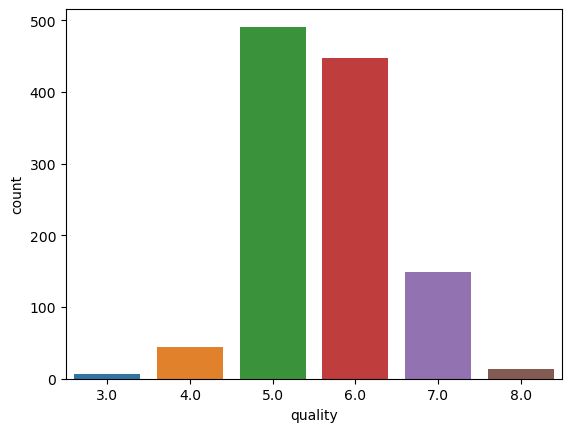

In [44]:
# value_count of quality column/Traget Variable
print('Unique values present in alcohol :', len(df2['quality'].value_counts()))
print(df2['quality'].value_counts())
sns.countplot(x='quality', data=df2)
plt.show()

## Classifying the wine quality as good or bad based on quality

In [45]:
# "Bad" or 0 if quality of wine lies in range of (3 to 6)
#"Good" or 1 if the quality of wine lies in range 7 or above 7

df2['quality']=df2['quality'].apply(lambda x: 1 if x > 6 else 0)
df2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.439412          0.978091    -1.530544       -0.602600  -0.166676   
1      -0.161475          1.720040    -1.530544        0.560720   0.778512   
2      -0.161475          1.242047    -1.256962        0.153076   0.557116   
3       1.529010         -1.551503     1.389613       -0.602600  -0.219369   
4      -0.439412          0.791661    -1.530544       -0.844564  -0.219369   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.269573             -0.128948  0.587781  1.277041  -0.582775   
1             0.992495              0.841796  0.054350 -0.695907   0.400130   
2             0.192377              0.530012  0.161294 -0.296058   0.188379   
3             0.384096              0.681966  0.694083 -0.967619  -0.391438   
4            -0.023152              0.100926  0.587781  1.277041  -0.582775   

    alcohol  quality  
0 -1.068157        0  
1 -0.499290        0  
2 -0.499290        0  
3 -0.499290        0  
4 -1.068157        0

0    1196
1     163
Name: quality, dtype: int64


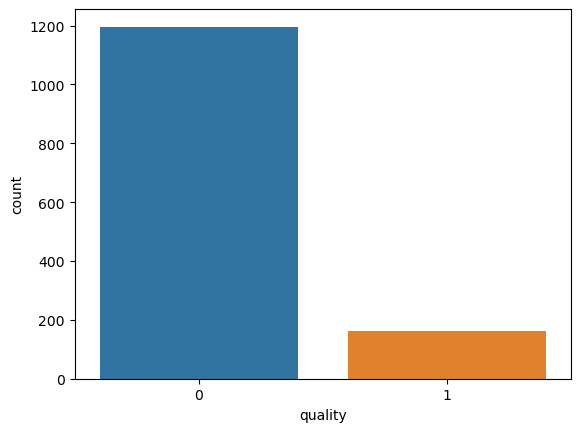

In [46]:
# Checking current value count of quality variable now
print(df2['quality'].value_counts())
sns.countplot(x='quality', data=df2)
plt.show()

Observations: As we can clearly visualise the ratio of 0(Bad Quality wine) is very high compared to 1(good quality wine)Lets Handle it.

In [47]:
x =df2.iloc[:,:-1]
y =df2.iloc[:,-1]
print(x.shape, y.shape)

(1359, 11) (1359,)


## Applying SMOTE to handle imbalance data in our target column

In [50]:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
xtrain,ytrain = sm.fit_resample(x,y)
print("Shape of train_x :",xtrain.shape)
print("Shape of train_y :",ytrain.shape)

Shape of train_x : (2392, 11)
Shape of train_y : (2392,)


In [51]:
# Checking current value count of quality variable now
ytrain.value_counts()

0    1196
1    1196
Name: quality, dtype: int64

Observations: As we use upscaling(SMOTE) so this increase the no. of samples to improve the accuracy

In [52]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
def calc_vif(xtrain):
    vif=pd.DataFrame()
    vif['variables']=xtrain.columns
    vif['VIF FACTOR']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
    return(vif)

calc_vif(xtrain)

variables  VIF FACTOR
0          fixed acidity    8.264927
1       volatile acidity    2.029688
2            citric acid    3.440338
3         residual sugar    1.858382
4              chlorides    1.452560
5    free sulfur dioxide    3.231308
6   total sulfur dioxide    3.757286
7                density    7.267461
8                     pH    3.624425
9              sulphates    1.433082
10               alcohol    3.399265

Observations:

As we can see VIF is less than 10 we will not remove any columns, and proceed further.
Since our output is having only two values "0" and "1", we will use binary classification model.

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix 

In [55]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain,random_state= i, test_size=.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)== round(accuracy_score(y_test, pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",accuracy_score(y_train,pred_train)*100)
        print("testing r2 score ",accuracy_score(y_test,pred_test)*100)

At Random state 51 The model perform very well
At random State: 51
Training r2_score 59.121798222686884
testing r2 score  59.081419624217126
At Random state 130 The model perform very well
At random State: 130
Training r2_score 59.853633037114484
testing r2 score  59.91649269311065
At Random state 162 The model perform very well
At random State: 162
Training r2_score 59.69681129116571
testing r2 score  59.707724425887264
At Random state 210 The model perform very well
At random State: 210
Training r2_score 58.86042864610559
testing r2 score  58.872651356993735
At Random state 241 The model perform very well
At random State: 241
Training r2_score 59.90590695243073
testing r2 score  59.91649269311065
At Random state 281 The model perform very well
At random State: 281
Training r2_score 59.487715629900684
testing r2 score  59.49895615866389
At Random state 314 The model perform very well
At random State: 314
Training r2_score 59.853633037114484
testing r2 score  59.91649269311065
At Rando

In [56]:
x_train, x_test, y_train, y_test= train_test_split(xtrain,ytrain,random_state=69,test_size=0.20)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       252
           1       0.48      0.48      0.48       227

    accuracy                           0.51       479
   macro avg       0.50      0.50      0.50       479
weighted avg       0.51      0.51      0.51       479



In [58]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore= cross_val_score(lr,xtrain,ytrain,cv=j)
    lsc=lsscore.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lsc*100)
    print("Accuracy Score:-", lss*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 47.90969899665552
Accuracy Score:- 61.16910229645094


at cv:- 3
Cross Validation scre is:- 51.54600218656218
Accuracy Score:- 61.16910229645094


at cv:- 4
Cross Validation scre is:- 51.29598662207358
Accuracy Score:- 61.16910229645094


at cv:- 5
Cross Validation scre is:- 52.63537180842236
Accuracy Score:- 61.16910229645094


at cv:- 6
Cross Validation scre is:- 52.67628871172907
Accuracy Score:- 61.16910229645094


at cv:- 7
Cross Validation scre is:- 53.178033059187555
Accuracy Score:- 61.16910229645094


at cv:- 8
Cross Validation scre is:- 53.38628762541806
Accuracy Score:- 61.16910229645094


at cv:- 9
Cross Validation scre is:- 53.76538831355116
Accuracy Score:- 61.16910229645094




In [59]:
lssscore_selected=cross_val_score(lr,xtrain,ytrain,cv=9).mean()
print("The cv score is: ", lssscore_selected,"\nThe accuracy score is: ", lss)

The cv score is:  0.5376538831355117 
The accuracy score is:  0.6116910229645094


In [60]:
rfcv=RandomForestClassifier()
rfcv.fit(x_train, y_train)
rfcv.score(x_train,y_train)
rfpred=rfcv.predict(x_test)

print (accuracy_score(y_test,rfpred))
print (confusion_matrix(y_test,rfpred))
print (classification_report(y_test,rfpred))
print('\n')

RFA=accuracy_score(y_test,rfpred)
RFcv=cross_val_score(rfcv,xtrain,ytrain,cv=9).mean()
print("The cv score is: ", RFcv,"\nThe accuracy score is: ", RFA)

0.918580375782881
[[226  26]
 [ 13 214]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       252
           1       0.89      0.94      0.92       227

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



The cv score is:  0.9063728503649061 
The accuracy score is:  0.918580375782881


In [61]:
gbcv=GaussianNB()
gbcv.fit(x_train, y_train)
gbcv.score(x_train,y_train)
gbpred=gbcv.predict(x_test)

print (accuracy_score(y_test,gbpred))
print (confusion_matrix(y_test,gbpred))
print (classification_report(y_test,gbpred))
print('\n')

GBA=accuracy_score(y_test,rfpred)
GBcv=cross_val_score(gbcv,xtrain,ytrain,cv=9).mean()
print("The cv score is: ", GBcv,"\nThe accuracy score is: ", GBA)

0.5824634655532359
[[120 132]
 [ 68 159]]
              precision    recall  f1-score   support

           0       0.64      0.48      0.55       252
           1       0.55      0.70      0.61       227

    accuracy                           0.58       479
   macro avg       0.59      0.59      0.58       479
weighted avg       0.59      0.58      0.58       479



The cv score is:  0.5673476143188159 
The accuracy score is:  0.918580375782881


In [62]:
kccv=KNeighborsClassifier()
kccv.fit(x_train, y_train)
kccv.score(x_train,y_train)
kcpred=kccv.predict(x_test)

print (accuracy_score(y_test,kcpred))
print (confusion_matrix(y_test,kcpred))
print (classification_report(y_test,kcpred))
print('\n')

KCA=accuracy_score(y_test,kcpred)
KCcv=cross_val_score(kccv,xtrain,ytrain,cv=9).mean()
print("The cv score is: ", KCcv,"\nThe accuracy score is: ", KCA)

0.7995824634655533
[[156  96]
 [  0 227]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       252
           1       0.70      1.00      0.83       227

    accuracy                           0.80       479
   macro avg       0.85      0.81      0.80       479
weighted avg       0.86      0.80      0.79       479



The cv score is:  0.7683863747418862 
The accuracy score is:  0.7995824634655533


In [63]:
dtcv=DecisionTreeClassifier()
dtcv.fit(x_train, y_train)
dtcv.score(x_train,y_train)
dtpred=dtcv.predict(x_test)

print (accuracy_score(y_test,dtpred))
print (confusion_matrix(y_test,dtpred))
print (classification_report(y_test,dtpred))
print('\n')

DTA=accuracy_score(y_test,dtpred)
DTcv=cross_val_score(dtcv,xtrain,ytrain,cv=9).mean()
print("The cv score is: ", dtcv,"\nThe accuracy score is: ", DTA)

0.8350730688935282
[[204  48]
 [ 31 196]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       252
           1       0.80      0.86      0.83       227

    accuracy                           0.84       479
   macro avg       0.84      0.84      0.84       479
weighted avg       0.84      0.84      0.84       479



The cv score is:  DecisionTreeClassifier() 
The accuracy score is:  0.8350730688935282


## Model Selection

In [64]:
Model= [LogisticRegression(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is:')
    print (accuracy_score(y_test,predm))
    print (confusion_matrix(y_test,predm))
    print (classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.6242171189979123
[[149 103]
 [ 77 150]]
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       252
           1       0.59      0.66      0.62       227

    accuracy                           0.62       479
   macro avg       0.63      0.63      0.62       479
weighted avg       0.63      0.62      0.62       479



Accuracy score of RandomForestClassifier() is:
0.9227557411273486
[[226  26]
 [ 11 216]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       252
           1       0.89      0.95      0.92       227

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



Accuracy score of GaussianNB() is:
0.5824634655532359
[[120 132]
 [ 68 159]]
              precision    recall  f1-score   support

           0       0.64      0.48   

Hyperparameter tuning: GridSearchCV (Accuracy Check)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters= {'n_estimators' : [20, 40, 60, 80, 100,120, 140,160, 200],
             'criterion':['gini', 'entropy'],
             'bootstrap':[0,1,0,1,0,1]}

model=RandomForestClassifier()
Grid= GridSearchCV(estimator=model, param_grid= parameters)
Grid.fit(x_train, y_train)


print(Grid)
print(Grid.best_score_)
print(Grid.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [0, 1, 0, 1, 0, 1],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          200]})
0.9127144478011839
{'bootstrap': 0, 'criterion': 'gini', 'n_estimators': 100}


In [67]:
p=Grid.predict(x_test)

print (accuracy_score(y_test,p))
print (confusion_matrix(y_test,p))
print (classification_report(y_test,p))
print('\n')

0.9227557411273486
[[227  25]
 [ 12 215]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       252
           1       0.90      0.95      0.92       227

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479





Observation: As we can see our model accuracy increased from 91% to 93% after hyper tuning

In [68]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF.score(x_train,y_train)

RFpred=RF.predict(x_test)
print(accuracy_score(y_test,RFpred ))
print(confusion_matrix(y_test,RFpred ))
print(classification_report(y_test,RFpred ))

0.918580375782881
[[226  26]
 [ 13 214]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       252
           1       0.89      0.94      0.92       227

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



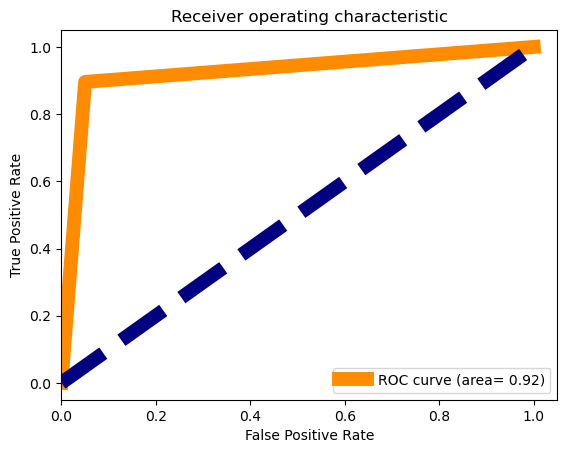

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(p, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### save the best Model

In [70]:
import pickle
filename='Red_Wine_Quality_Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))

In [71]:
#loading Model
load_model=pickle.load(open('Red_Wine_Quality_Prediction.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

91.8580375782881


In [72]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion


0    1    2    3    4    5    6    7    8    9    ...  469  470  \
Predicted    0    0    0    1    0    1    1    1    1    0  ...    1    1   
Original     0    0    0    1    0    1    1    1    1    0  ...    0    1   

           471  472  473  474  475  476  477  478  
Predicted    1    0    0    1    1    0    0    1  
Original     1    0    0    1    1    0    0    1  

[2 rows x 479 columns]